In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
import geoplot

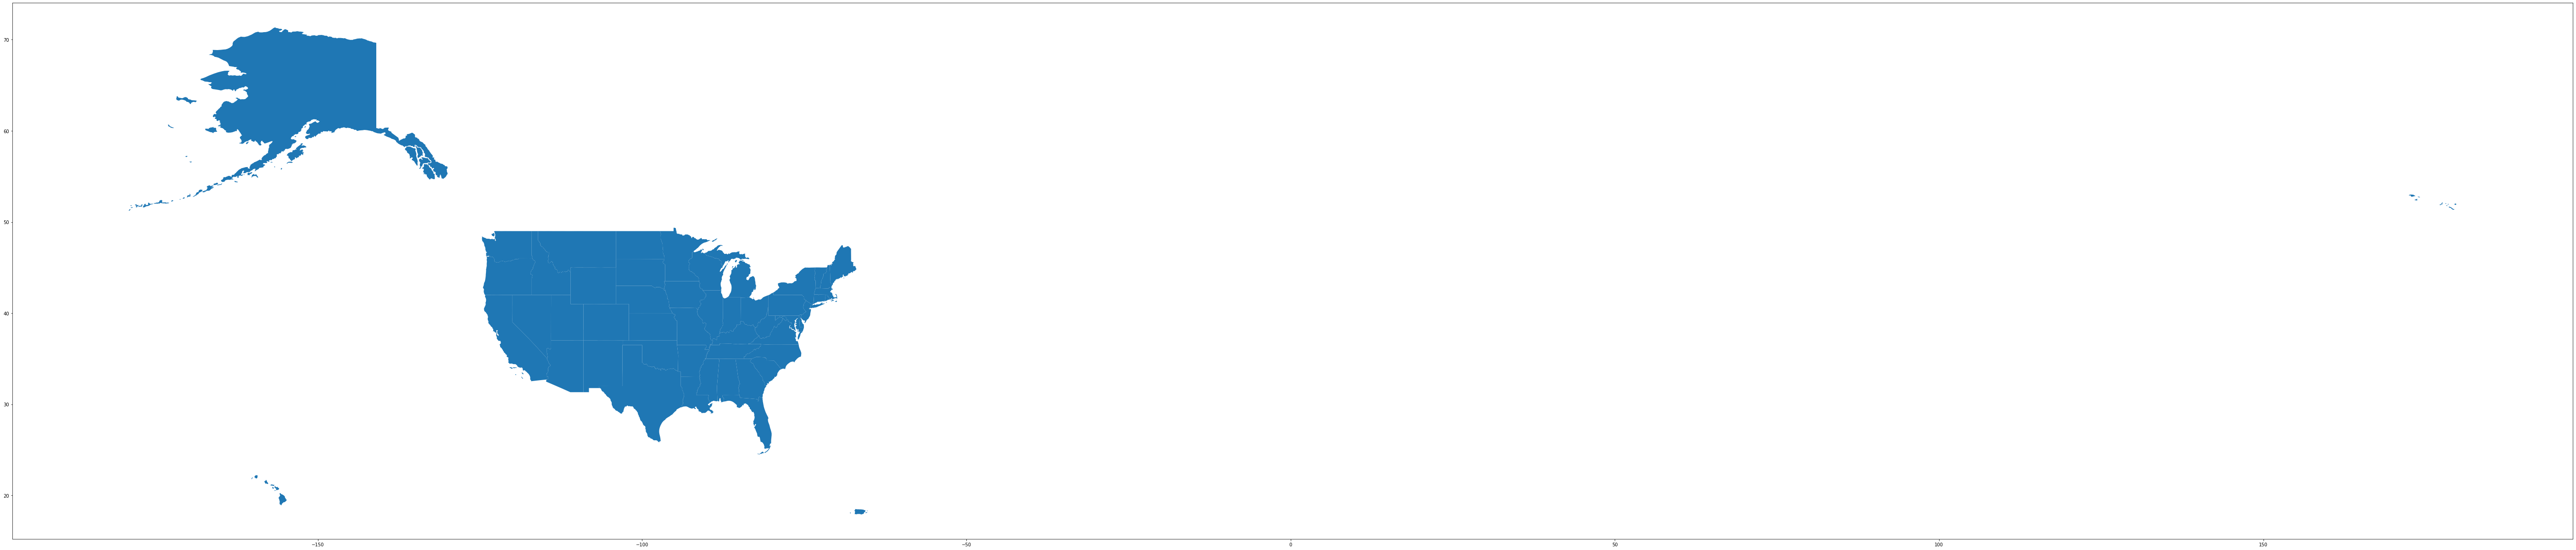

In [2]:
us = gpd.read_file("cb_2018_us_state_20m\cb_2018_us_state_20m.shp")
# map_df is a Pandas dataframe
f, ax = plt.subplots(1, figsize=(100, 100))
ax = us.plot(ax=ax)
us = us.sort_values(by=['NAME'])
us = us[us.NAME != 'Puerto Rico']
us = us.reset_index()

In [3]:
df_cand = pd.read_csv('dataverse_files/1976-2016-president.csv')

In [4]:
election_year_2016 = (df_cand['year'] == 2016 )
df_cand = df_cand[election_year_2016]
drop_cand = df_cand.party.isnull() | (df_cand['party']!='republican') & (df_cand['party']!='democrat')
df_cand = df_cand.drop(df_cand[drop_cand].index)
drop_cand = df_cand.candidate.isnull() | (df_cand['candidate']=='Unknown')
df_cand = df_cand.drop(df_cand[drop_cand].index)
df_cand

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party,writein,candidatevotes,totalvotes,version,notes
3395,2016,Alabama,AL,1,63,41,US President,"Trump, Donald J.",republican,False,1318255,2123372,20171015,NaN
3396,2016,Alabama,AL,1,63,41,US President,"Clinton, Hillary",democrat,False,729547,2123372,20171015,NaN
3400,2016,Alaska,AK,2,94,81,US President,"Trump, Donald J.",republican,False,163387,318608,20171015,NaN
3401,2016,Alaska,AK,2,94,81,US President,"Clinton, Hillary",democrat,False,116454,318608,20171015,NaN
3407,2016,Arizona,AZ,4,86,61,US President,"Trump, Donald J.",republican,False,1252401,2573165,20171015,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3719,2016,West Virginia,WV,54,55,56,US President,"Clinton, Hillary",democrat,False,188794,713051,20171015,NaN
3723,2016,Wisconsin,WI,55,35,25,US President,"Trump, Donald J.",republican,False,1405284,2976150,20171015,NaN
3724,2016,Wisconsin,WI,55,35,25,US President,"Clinton, Hillary",democrat,False,1382536,2976150,20171015,NaN
3732,2016,Wyoming,WY,56,83,68,US President,"Trump, Donald J.",republican,False,174419,258788,20171015,NaN


In [5]:
df_cand['state'] = df_cand['state'].drop_duplicates(keep='first')
drop_cand = df_cand.state.isnull()
df_cand = df_cand.drop(df_cand[drop_cand].index)
df_cand = df_cand.reset_index()

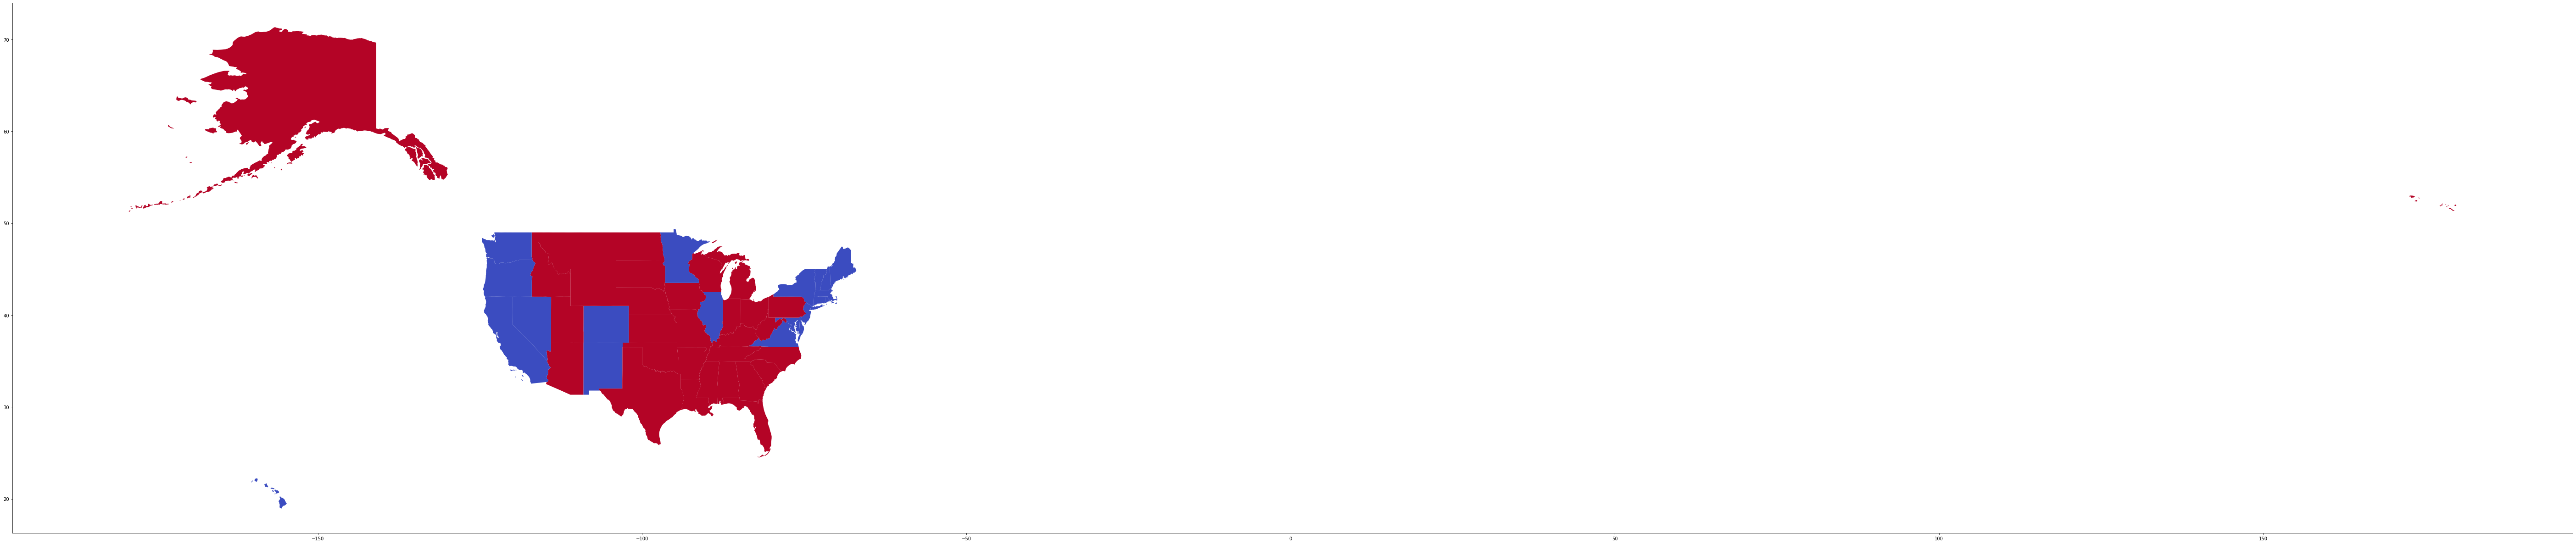

In [6]:
winning = df_cand['party']
winning = winning.reset_index()
winning = winning.drop(columns=['index'])
us['Winner'] = winning
f, ax = plt.subplots(1, figsize=(100, 100))
us.plot(column='Winner', ax=ax, cmap='coolwarm')
df_cand['Winner'] = winning